## Imports

In [1]:
import pandas as pd
import plotly.express as px

## Reading the raw data from a csv

In [2]:
raw_data=pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')

In [3]:
raw_data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


## Checking for nulls

In [4]:
raw_data.isnull().sum()/raw_data.count()*100

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.847208
Title                                       0.000000
uploads                                     0.000000
Country                                    13.974800
Abbreviation                               13.974800
channel_type                                3.108808
video_views_rank                            0.100604
country_rank                               13.196815
channel_type_rank                           3.430353
video_views_for_the_last_30_days            5.963791
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
subscribers_for_last_30_days               51.

## Droping columns with Nulls since they are not needed in the following analysis

In [5]:
to_drop=raw_data.isnull().sum().apply(lambda col: (col > 0))

In [6]:
data=raw_data.loc[:,~to_drop]

In [7]:
data.isnull().sum()

rank                        0
Youtuber                    0
subscribers                 0
video views                 0
Title                       0
uploads                     0
lowest_monthly_earnings     0
highest_monthly_earnings    0
lowest_yearly_earnings      0
highest_yearly_earnings     0
dtype: int64

## Exporting the data to a csv file for use with other software

In [8]:
data.to_csv('Global YouTube Statistics_reduced.csv')

## Filtering the data to drop channels containing no uploads or views, for instance some channels owned by Youtube

In [9]:
data=data[(data['uploads']>0)]
data=data[(data['video views']>0)]

## Checking some basic statistics regarding the values in the data

In [10]:
data.describe()

,rank,subscribers,video views,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
count,949.000000,9.490000e+02,9.490000e+02,949.000000,949.000000,9.490000e+02,9.490000e+02,9.490000e+02
mean,501.249737,2.268040e+07,1.124164e+10,9632.437302,38674.096459,6.183971e+05,4.636945e+05,7.425084e+06
std,287.215744,1.668726e+07,1.436056e+10,34908.656580,73109.603589,1.168612e+06,8.762030e+05,1.403722e+07
min,1.000000,1.230000e+07,2.634000e+03,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,254.000000,1.450000e+07,4.352427e+09,240.000000,3900.000000,6.220000e+04,4.670000e+04,7.467000e+05
50%,502.000000,1.770000e+07,7.773544e+09,796.000000,14600.000000,2.341000e+05,1.756000e+05,2.800000e+06
75%,751.000000,2.430000e+07,1.389793e+10,2905.000000,40100.000000,6.409000e+05,4.807000e+05,7.700000e+06
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08


## Checking for duplicates

In [11]:
data.duplicated(subset='Title').sum()

3

In [12]:
data

,rank,Youtuber,subscribers,video views,Title,uploads,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
0,1,T-Series,245000000,2.280000e+11,T-Series,20082,564600.0,9000000.0,6800000.0,108400000.0
2,3,MrBeast,166000000,2.836884e+10,MrBeast,741,337000.0,5400000.0,4000000.0,64700000.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Cocomelon - Nursery Rhymes,966,493800.0,7900000.0,5900000.0,94800000.0
4,5,SET India,159000000,1.480000e+11,SET India,116536,455900.0,7300000.0,5500000.0,87500000.0
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,ýýý Kids Diana Show,1111,182900.0,2900000.0,2200000.0,35100000.0
...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Natan por Aï¿,1200,138100.0,2200000.0,1700000.0,26500000.0
991,992,Free Fire India Official,12300000,1.674410e+09,Free Fire India Official,1500,16200.0,258900.0,194200.0,3100000.0
992,993,Panda,12300000,2.214684e+09,HybridPanda,2452,17.0,268.0,201.0,3200.0
993,994,RobTopGames,12300000,3.741235e+08,RobTopGames,39,968.0,15500.0,11600.0,185800.0


## Changing order of rows and keeping relevant columns only

In [13]:
data=data.reindex(['Title','uploads','video views','subscribers'], axis=1)

In [14]:
data

,Title,uploads,video views,subscribers
0,T-Series,20082,2.280000e+11,245000000
2,MrBeast,741,2.836884e+10,166000000
3,Cocomelon - Nursery Rhymes,966,1.640000e+11,162000000
4,SET India,116536,1.480000e+11,159000000
6,ýýý Kids Diana Show,1111,9.324704e+10,112000000
...,...,...,...,...
990,Natan por Aï¿,1200,9.029610e+09,12300000
991,Free Fire India Official,1500,1.674410e+09,12300000
992,HybridPanda,2452,2.214684e+09,12300000
993,RobTopGames,39,3.741235e+08,12300000


## Grouping by Title and aggregating with maximum value to get rid of duplicates
Also sorting by video reviews, descending

In [15]:
data=data.groupby(['Title']).max()

In [16]:
data=data.reset_index()
data.rename(columns={'Title':'channel'},inplace=True)

## Adding columns for KPIs, avg_views_per_subscriber, avg_views_per_upload, subscriber_engagement_rate

In [ ]:
data['avg_views_per_sub']=data['video views']/data['subscribers']
data['avg_views_per_upload']=data['video views']/data['uploads']
data['sub_engagement_rate']=data['subscribers']/data['uploads']
data

## Sort over descending video views and display top 10

In [49]:
top10_views=data.sort_values(by=['video views'],ascending=False).head(10)
top10_views

,channel,uploads,video views,subscribers,avg_views_per_sub,avg_views_per_upload,sub_engagement_rate
672,T-Series,20082,2.280000e+11,245000000,930.612245,1.135345e+07,12199.980082
140,Cocomelon - Nursery Rhymes,966,1.640000e+11,162000000,1012.345679,1.697723e+08,167701.863354
612,SET India,116536,1.480000e+11,159000000,930.817610,1.269994e+06,1364.385254
653,Sony SAB,71270,1.010000e+11,83000000,1216.867470,1.417146e+06,1164.585380
913,ýýý Kids Diana Show,1111,9.324704e+10,112000000,832.562862,8.393073e+07,100810.081008
421,Like Nastya Vlog,493,9.047906e+10,106000000,853.576038,1.835275e+08,215010.141988
789,WWE,70127,7.742847e+10,96000000,806.546601,1.104118e+06,1368.944914
773,Vlad and Niki,574,7.718017e+10,98900000,780.385944,1.344602e+08,172299.651568
831,Zee TV,129204,7.313905e+10,70500000,1037.433397,5.660742e+05,545.648742
146,Colors TV,112915,6.151091e+10,64600000,952.181215,5.447541e+05,572.111765


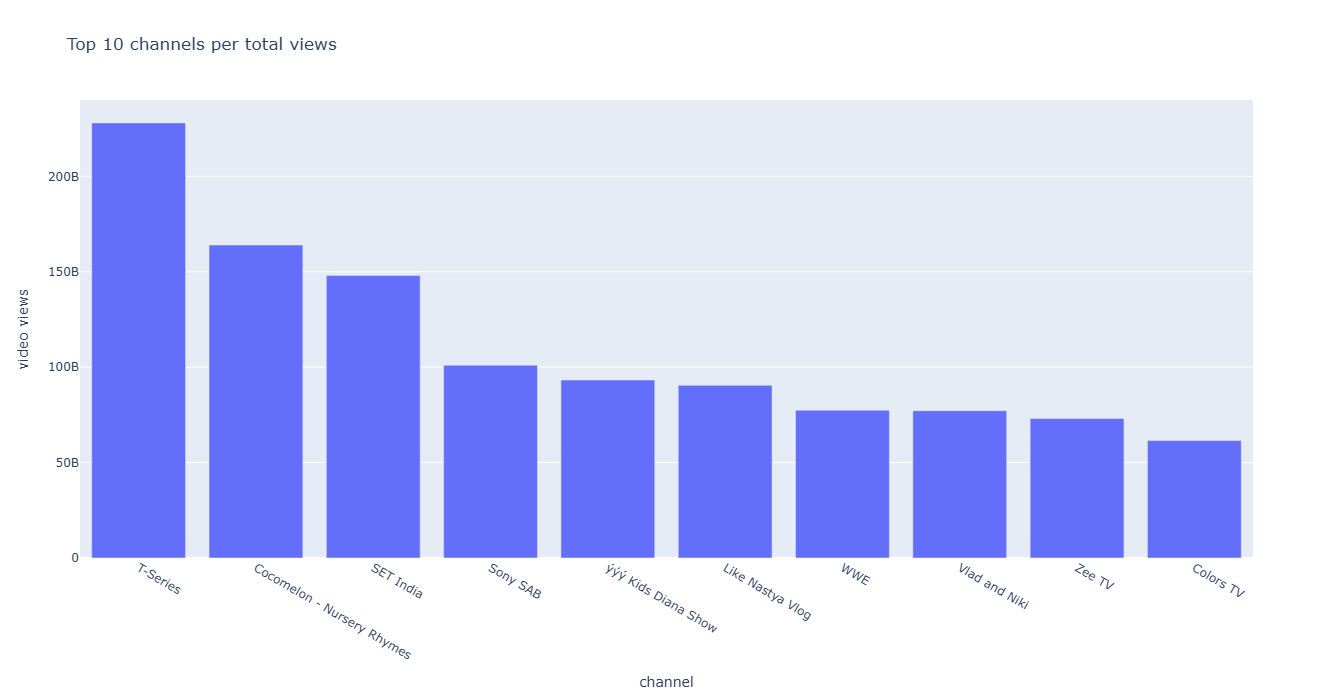

In [50]:
bar_top_views=px.bar(top10_views, x='channel', y='video views', title='Top 10 channels per total views', width=1000, height=700)
bar_top_views.show()

## Sort over descending subscribers and display top 10

In [51]:
top10_subs=data.sort_values(by=['subscribers'],ascending=False).head(10)
top10_subs

,channel,uploads,video views,subscribers,avg_views_per_sub,avg_views_per_upload,sub_engagement_rate
672,T-Series,20082,2.280000e+11,245000000,930.612245,1.135345e+07,12199.980082
497,MrBeast,741,2.836884e+10,166000000,170.896638,3.828454e+07,224021.592443
140,Cocomelon - Nursery Rhymes,966,1.640000e+11,162000000,1012.345679,1.697723e+08,167701.863354
612,SET India,116536,1.480000e+11,159000000,930.817610,1.269994e+06,1364.385254
913,ýýý Kids Diana Show,1111,9.324704e+10,112000000,832.562862,8.393073e+07,100810.081008
558,PewDiePie,4716,2.905804e+10,111000000,261.784184,6.161587e+06,23536.895674
421,Like Nastya Vlog,493,9.047906e+10,106000000,853.576038,1.835275e+08,215010.141988
773,Vlad and Niki,574,7.718017e+10,98900000,780.385944,1.344602e+08,172299.651568
829,Zee Music Company,8548,5.785629e+10,96700000,598.307026,6.768401e+06,11312.587740
789,WWE,70127,7.742847e+10,96000000,806.546601,1.104118e+06,1368.944914


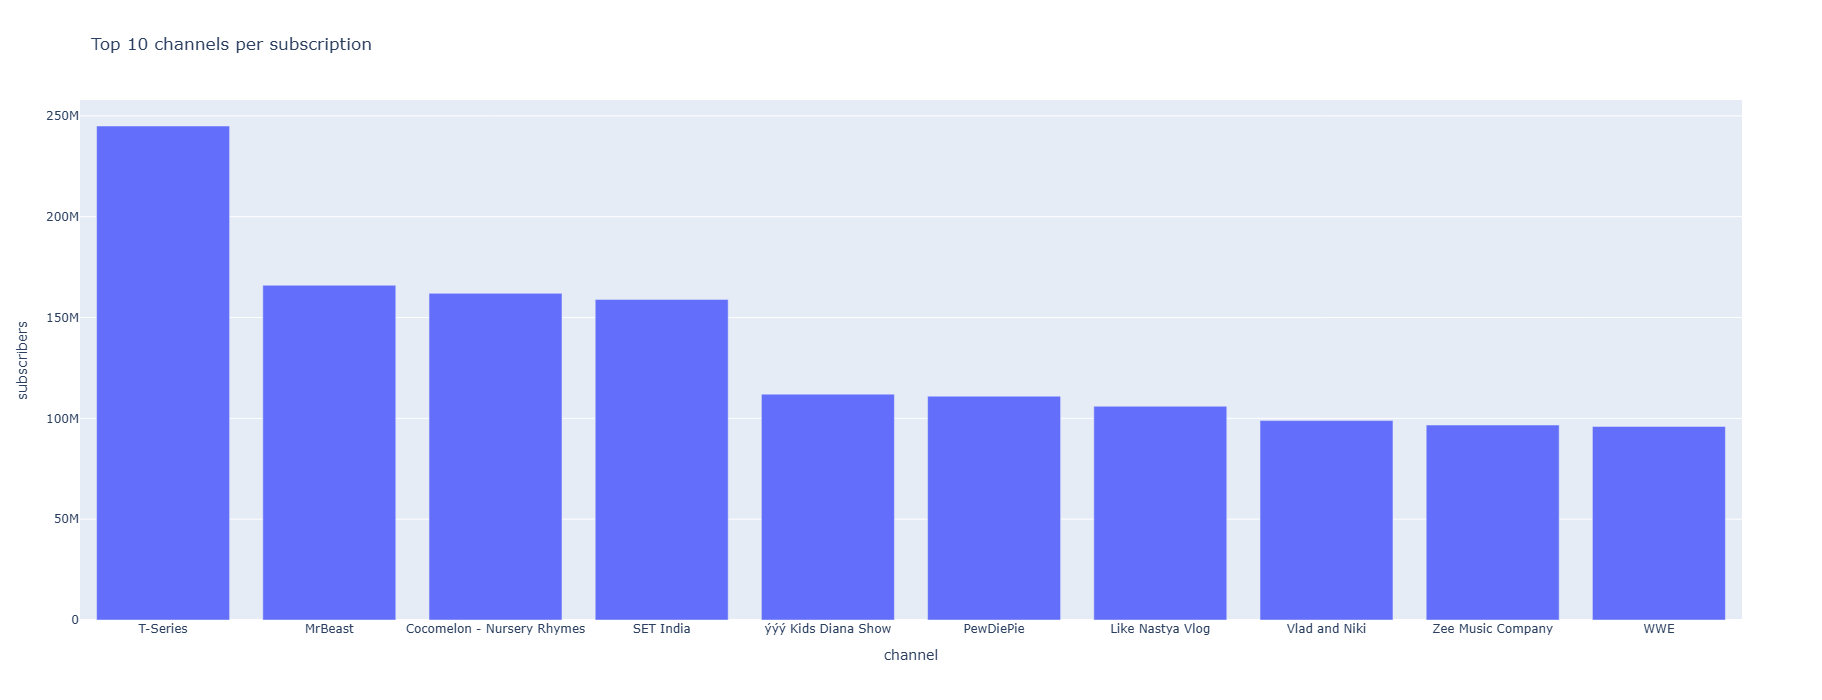

In [52]:
bar_top_subs=px.bar(top10_subs, x='channel', y='subscribers', title='Top 10 channels per subscription', width=1000, height=700)
bar_top_subs.show()

## Evaluate top 10 lists (both by views and by subscribers) with a radar plot

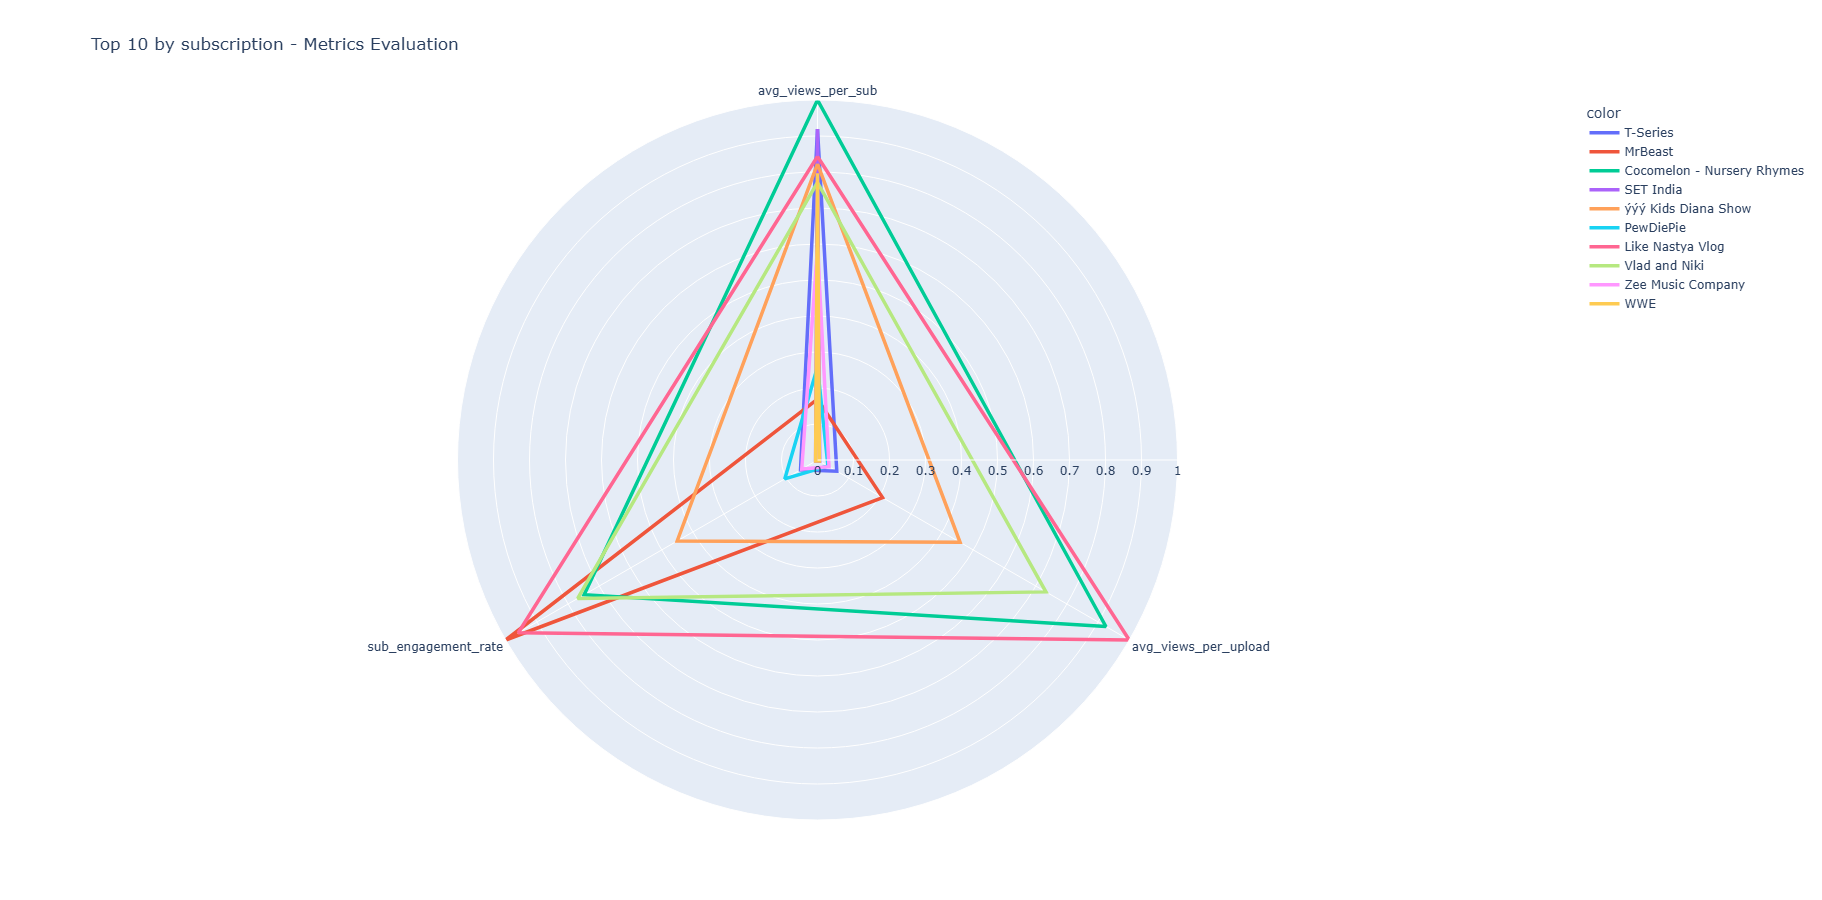

In [87]:
temp=[]

for i in range(len(top10_subs)):
    df = pd.DataFrame(dict(
        r=top10_subs.iloc[i].values[-3:]/[top10_subs['avg_views_per_sub'].max(), top10_subs['avg_views_per_upload'].max(), top10_subs['sub_engagement_rate'].max()],
        theta=['avg_views_per_sub', 'avg_views_per_upload', 'sub_engagement_rate'],
        color=top10_subs.iloc[i].values[0]))
    temp.append(df)
df = pd.concat(temp, axis=0)
fig = px.line_polar(df, r='r', color='color', theta='theta', line_close=True, width=1200, height=900, title='Top 10 by subscription - Metrics Evaluation')
fig.update_traces(line=dict(width=3.5))
fig.show()

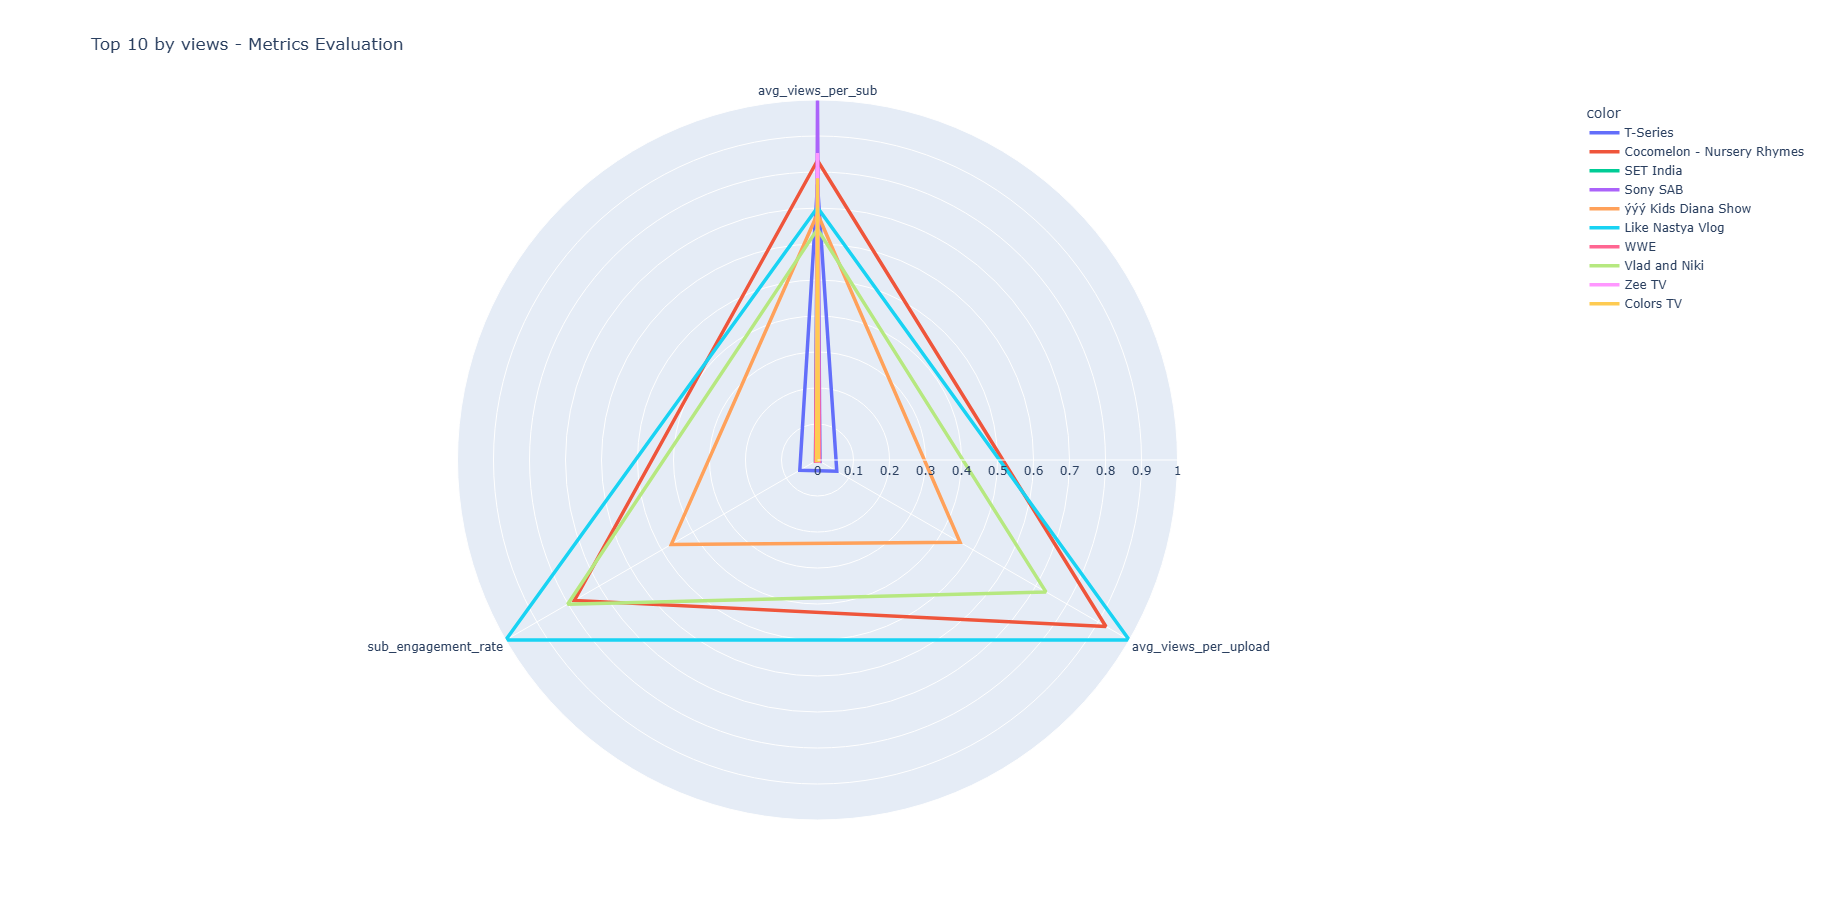

In [88]:
temp=[]

for i in range(len(top10_views)):
    df = pd.DataFrame(dict(
        r=top10_views.iloc[i].values[-3:]/[top10_views['avg_views_per_sub'].max(), top10_views['avg_views_per_upload'].max(), top10_views['sub_engagement_rate'].max()],
        theta=['avg_views_per_sub', 'avg_views_per_upload', 'sub_engagement_rate'],
        color=top10_views.iloc[i].values[0]))
    temp.append(df)
df = pd.concat(temp, axis=0)
fig = px.line_polar(df, r='r', color='color', theta='theta', line_close=True, width=1200, height=900, title='Top 10 by views - Metrics Evaluation')
fig.update_traces(line=dict(width=3.5))
fig.show()

## Results : Good candidates for marketing investment

In both metrics evaluation graphs, the 3 dominating candidate channels seem to be


Like Nastya Vlog

Cocomelon - Nursery Rhymes

Vlad and Niki